In [202]:
%matplotlib inline

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbf{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\z}{\mathbf{z}}$
$\newcommand{\Y}{\mathbf{Y}}$
$\newcommand{\Z}{\mathbf{Z}}$
$\newcommand{\a}{\mathbf{a}}$
$\newcommand{\W}{\mathbf{W}}$

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [204]:
from ggplot import *

In [205]:
from matplotlib import colors as clrs
from matplotlib.colors import ListedColormap

In [206]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [207]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from scipy.stats import laplace

In [208]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)#[:,0]
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    # plot samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # test samples highlight
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

In [209]:
def plot_space(X, y, X_transformed = None, method = None, space = 'original', grid_dim = 40):
    input_data = pd.DataFrame(dict ({'x':X[:, 0], 'y':X[:, 1], 'target':y}))
    min_val = np.min (X)
    max_val = np.max (X)
    delta = (max_val - min_val) / grid_dim
    xx = yy = np.arange (min_val, min_val + delta * (grid_dim + 1), delta)
    I = np.vstack (np.meshgrid (xx, yy)).reshape (2, - 1).T
    if space == 'feature':
        title = 'Feature space'
        feature_data = pd.DataFrame(dict ({'x':X_transformed[:, 0], 'y':X_transformed[:, 1], 'target':y}))
        I = method.transform (I)
        I = I[:,:2]
        dat = feature_data
    else:
        title = 'Original space'
        dat = input_data

    Fgrid = pd.DataFrame (I)
    Fgrid.columns =['x', 'y']
    Fgrid['col'] = np.tile (np.arange (grid_dim + 1), grid_dim + 1)
    
    p = ggplot(aes('x', 'y'),data=Fgrid) + geom_path(aes('x', 'y'), alpha = 0.5)
    p+= geom_point(aes('x', 'y', colour='target'), data = dat, size = 15) 
    return p

In [210]:
def plot_kernel_lines(X, y, method = None, grid_dim = 40):
    data = pd.DataFrame(dict ({'x':X[:, 0], 'y':X[:, 1], 'target':y}))
    data['color'] =['red' if variable == 0 else 'blue' for variable in data['target']]

    min_val = np.min (X)
    max_val = np.max (X)
    delta = (max_val - min_val) / grid_dim
    xx = yy = np.arange (min_val, min_val + delta * (grid_dim + 1), delta)
    xx, yy = np.meshgrid (xx, yy)
    xy = np.array ([np.ravel (xx), np.ravel (yy)]).T
    z = method.transform (xy)[:, 0].reshape (xx.shape)

    levels = np.arange(np.min(z),np.max(z),0.005)
    plt.contour(xx, yy, z, levels=levels)
    plt.scatter(data['x'], data['y'], color=data['color']);

### Toy data for classification

In [211]:
X, y = make_moons (noise = 0.1, n_samples = 1000)

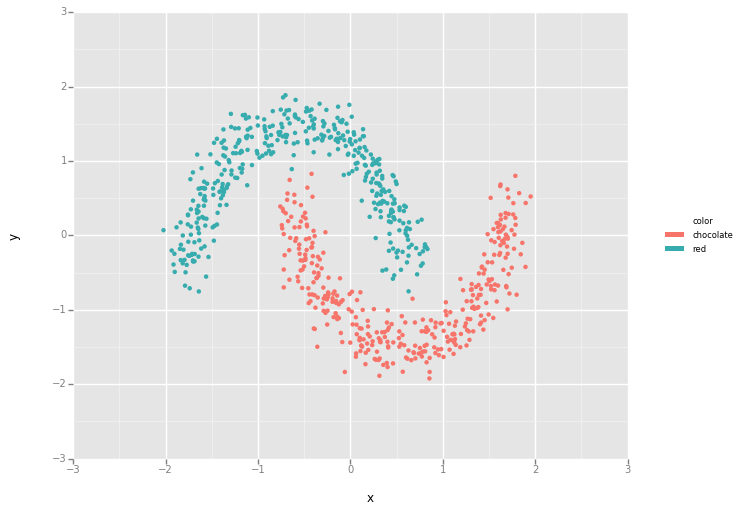

<ggplot: (-9223372036559148754)>

In [212]:
n_centers = 2
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
dat = {'x': X_train.T[0], 'y': X_train.T[1], 'variable': y_train}
dat = pd.DataFrame(dat)
colors = dict(zip(np.arange(n_centers),list(clrs.cnames.keys())[:n_centers]))
dat['color'] = [colors[variable] for variable in dat['variable']]
ggplot(aes(x='x', y='y', group='variable',color='color'),dat) + geom_point()

### Kernel classifier
* Train data examples $(x_1,y_1),\ldots,(x_n,y_n)\in\Xset\times\Yset$, where $y\in\{-1,+1\}$ - dihotomy classification problem.
* **Task:** for a new point $x$ predict its label $y$. 

### Feature map and feature space
* Consider mapping to *feature space* with a dot product: $k(x,x^{\prime})=\left(\phi(x),\phi(x^{\prime})\right)$, where $\phi$ - is a *feature map*.
* Calculate means of the classes in the feature space: $\displaystyle{c_{*}=\frac{1}{n_{*}}\sum_{i:y_i=*1}\phi(x_i)}$, where $*$ stands for $-$ or $+$

### Classification in the feature space
* Let $x$ be a new point. Define the class prediction rule as
$$\displaystyle{y=\sign\left(\left(\phi(x),c_{+}\right)-\left(\phi(x),c_{-}\right)+b \right),}$$ with $b$ standing for bias:
$$b=\frac{1}{2}(\|c_{-}-c_{+}\|^2)$$
* This can be written in the familiar form: $y=\sign (\w^t \x$), where $\w=c_+-c_-$ and $\x=\phi(x)$
* Putting there our definition of $c_{*}$, one can get
$$\displaystyle{y=\sign\left(\frac{1}{n_{+}}\sum_{i:y_i=+1}(\phi(x),\phi(x_i))-\frac{1}{n_{-}}\sum_{i:y_i=-1}(\phi(x),\phi(x_i))+b\right)}$$

### Kernels
* **Gaussian RBF kernel:** $$k(x,y)=\exp(-\gamma\|x-y\|^2)$$
Unfotunately, feature map $\phi$ is infinite dimensional...

In [213]:
def kernel_rbf(x, xi = None, gamma = None):
    x, xi = check_pairwise_arrays(x, xi)
    if gamma == None:
        gamma = 1.0 / x.shape[1]
    K = - gamma * euclidean_distances (x, xi, squared = True)
    return np.exp (K)

* **Polynomial kernel:** $$k(x,y)=(\gamma x^Ty+c_0)^d$$
Featute map even in this case looks ugly, but...

In [215]:
def kernel_poly(x, xi = None, degree = 3, gamma = None, coef0 = 1):
    x, xi = check_pairwise_arrays(x, xi)
    if gamma is None:
        gamma = 1.0 / x.shape[1]
    return (coef0 + gamma * np.dot (x, xi.T)) ** degree

we can avoid using explicit expressions for feature maps and write down our decision rule in terms of kernels:
$$\displaystyle{y=\sign\left(\frac{1}{n_{+}}\sum_{i:y_i=+1}k(x,x_i)-\frac{1}{n_{-}}\sum_{i:y_i=-1}k(x,x_i)+b\right)}$$
This substitution is called **kernel trick**

In [218]:
def step_function(x, margin = 0, label =[0, 1]):
    return np.where (x >= margin, label[1], label[0])

In [220]:
class KernelClassifier(object):

    def __init__(self, kernel = 'rbf', gamma = None, degree = 3, coef0 = 1):
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.kernel = kernel

    def fit(self, X, y):
        self.X = X
        self.y = y
        # count number of points in subsets
        self.n = np.array([np.count_nonzero(1 + np.array (np.where (self.y == self.y[i]))) for i in range (len (self.y))])
        # compute bias
        a = self.get_kernel (self.X, self.X)
        b = step_function (self.y, 0.5,[1, - 1]) / self.n ** 2 / 2.0
        self.b = np.sum (np.multiply (a, b))
        return self

    def get_kernel(self, x, xi):
        if self.kernel == 'poly':
            return kernel_poly (x, xi, self.degree, self.gamma, self.coef0)
        elif self.kernel == 'linear':
            self.degree = 1
            self.coef0 = 0
            self.gamma = 1
            return kernel_poly (x, xi, self.degree, self.gamma, self.coef0)
        elif self.kernel == 'rbf':
            return kernel_rbf (x, xi, self.gamma)

    def predict(self, X):
        a = self.get_kernel (X, self.X)
        b = step_function (self.y, 0.5,[- 1, 1]) / self.n
        y = np.sum (np.multiply (a, b), axis = 1) + self.b
        return step_function (y)

    def decision_function(self, X):
        a = self.get_kernel (X, self.X)
        b = step_function (self.y, 0.5,[- 1, 1]) / self.n
        y = np.sum (np.multiply (a, b), axis = 1) + self.b
        return y

In [221]:
kcls = KernelClassifier (kernel = 'rbf', gamma = 6.)
kcls.fit(X_train, y_train);

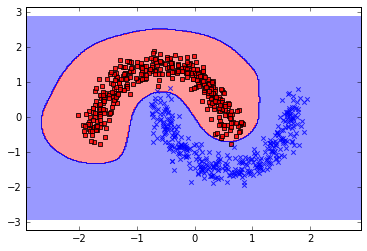

In [222]:
plot_decision_regions(X_train, y_train, kcls)

### Kernel PCA
* Let $\phivec: \mathbb{R}^{m_0} \rightarrow \mathbb{R}^{m_1}$ be a mapping from input space to a feature space. Usually $m_1 >> m_0$. 
* Let $\{\x_i\}_{i=1}^n$ - be *unlabeled* training sample. 
* Define covariance matrix in the feature space (supposing, that $\phivec(\x_i)$ have zero mean) $$\displaystyle{\R=\frac{1}{n}\sum_{i=1}^n\phivec(\x_i)\phivec(\x_i)^T}$$
* As in case of PCA, we are going to solve the eigenvector-eigenvalue problem $$\displaystyle{\R\v=\lambda_R\v},$$ where $\lambda_R$ and $\v$ - eigenvalue and associated eigenvector of the feature covariance matrix.
* Define $n\times n$ Gram matrix $\displaystyle{\K=\left\{k(\x_i,\x_j)\right\}_{i,j=1}^n}$, where $k(\x_i,\x_j)=\phivec^T(\x_i)\phivec(\x_j)$
* We need a **preprocessing step**, ensuring, that $\displaystyle{\frac{1}{n}\sum_{i=1}^n\phivec(\x_i)=0}$:
take $$\K_{centered}=\K-\I_n\cdot\K-\K\cdot\I_n+\I_n\cdot\K\cdot\I_n$$ as a preprocessed version of Gram matrix, where $\I_n$ is a matrix, each element of which is $\displaystyle{\frac{1}{n}}$

#### Connection between $\mathbf{R}$ and $\mathbf{K}$
* From eigenvector equation (substituting there the definition of $\mathbf{R}$) we get $$\displaystyle{\frac{1}{n}\sum_{i=1}^n\phivec(\x_i)\phivec(\x_i)^T\v=\lambda_R\v}$$
and $$\displaystyle{\v=\frac{1}{n\lambda_R}\sum_{i=1}^n\phivec(\x_i)\phivec(\x_i)^T\v}$$

* There exist (for all the vectors, satisfying eigenvector equation) vector of coefficients $\alpha$, such that $$\displaystyle{\v=\frac{1}{n}\sum_{i=1}^n\alpha_i\phivec(\x_i)}$$

* Rewrite in matrix notation
    * Feature covariance matrix $\displaystyle{\mathbf{R}=\frac{1}{n}\phivec(\X)^T\phivec(\X)}$
    * Gram matrix $\displaystyle{\mathbf{K}=\phivec(\X)\phivec(\X)^T}$
    * and eigenvector decomposition $\displaystyle{\v=\lambda_R\phivec(\X)^T\alpha}$
* Put this into the eigenvector equiation: $$\displaystyle{\frac{1}{n}\phivec(\X)^T\phivec(\X)\phivec(\X)^T\alpha=\lambda_R\phivec(\X)^T\alpha}$$

* Multiply both sides by $\phivec(\X)$: $$\displaystyle{\frac{1}{n}\phivec(\X)\phivec(\X)^T\phivec(\X)\phivec(\X)^T\alpha=\lambda_R\phivec(\X)\phivec(\X)^T\alpha}$$
* Finally we get the eigenvector equation: $\displaystyle{\frac{1}{n}\mathbf{K}\alpha=\lambda_R\alpha}$

In [223]:
def kernel_centerer(K):
    n = K.shape[0]
    In = np.ones((n, n)) / n
    Kc = K - np.dot (In, K) - np.dot (K, In) + np.dot (np.dot (In, K), In)
    return Kc

* Solve eigenvalue problem: $\displaystyle{\K\alpha=\lambda\alpha}$, where $\lambda$ - eigenvalue and $\alpha$ - is associated eigenvector.

In [224]:
def kernel_eig(K, centered = True):
    if not centered:
        K = kernel_centerer (K)
    eig_val, eig_vec = np.linalg.eigh (K)
    # sort eigen values in descending order
    idx = np.argsort (eig_val)[::- 1]
    eig_val = eig_val[idx]
    eig_vec = eig_vec[:, idx]
    # zero eigenvectors with zero eigenvalues
    eig_vec = eig_vec[:, eig_val > 0]
    eig_val = eig_val[eig_val > 0]
    return eig_val, eig_vec

* Normalize obtained egenvectors: $\displaystyle{\alpha_i^T\alpha_i=\frac{1}{\lambda_i}}$
* **Project new points** $\x$ to a feature space by applying kernel trick: 
$$\displaystyle{\v_i^T\phivec(\x)=\sum_{j=1}^n\alpha_{i,j}k(\x_j,\x)},$$ where $\alpha_{i,j}$ - is the $j$-th element of eigenvector $\alpha_i$, associated with Gram matrix $\K$ and $\v$ - is an eigen-vector for the covariance matrix $\mathbf{R}$.
* Thus we obtain **nonlinear principal components in feature space** $\mathbb{R}^{m_1}$

In [225]:
class KernelTransformer(object):

    def __init__(self, kernel = 'rbf', gamma = None, degree = 3, coef0 = 1):
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.kernel = kernel

    def fit(self, X, y):
        self.X = X
        self.y = y
        # compute eigen vectors
        K = self.get_kernel (self.X)
        self.eig_val, self.eig_vec = kernel_eig(K, centered=False)
        return self

    def get_kernel(self, x, xi = None):
        x, xi = check_pairwise_arrays(x, xi)
        if self.kernel == 'poly':
            K = kernel_poly (x, xi, self.degree, self.gamma, self.coef0)
        elif self.kernel == 'linear':
            self.degree = 1
            self.coef0 = 0
            self.gamma = 1
            K = kernel_poly (x, xi, self.degree, self.gamma, self.coef0)
        elif self.kernel == 'rbf':
            K = kernel_rbf (x, xi, self.gamma)
        return K

    def transform(self, X):
        K = self.get_kernel (X, self.X)
        return np.dot(K, self.eig_vec / self.eig_val)

In [226]:
kt = KernelTransformer(kernel='rbf', gamma=2, degree=2, coef0=0.1)
kt.fit (X_train, y_train);

Let's draw original space with coordinate lines...

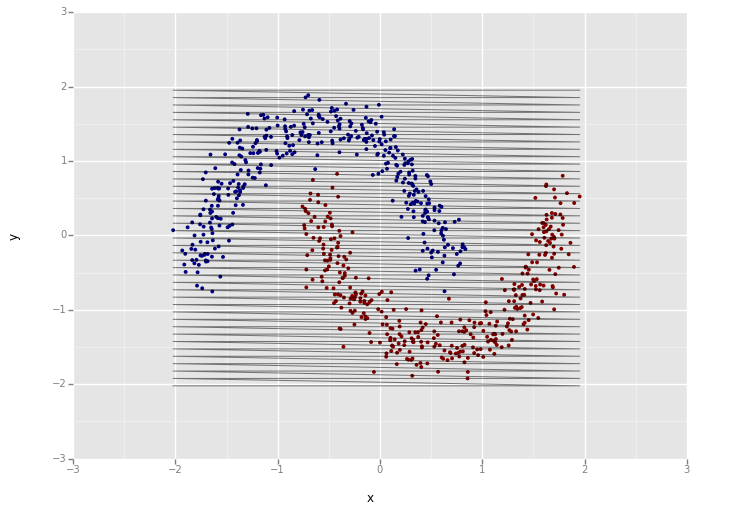

<ggplot: (-9223372036537080453)>

In [227]:
plot_space(X_train, y_train)

... to see, how this lines are transformed by feature map. 
See projection on two main components in the feature space below

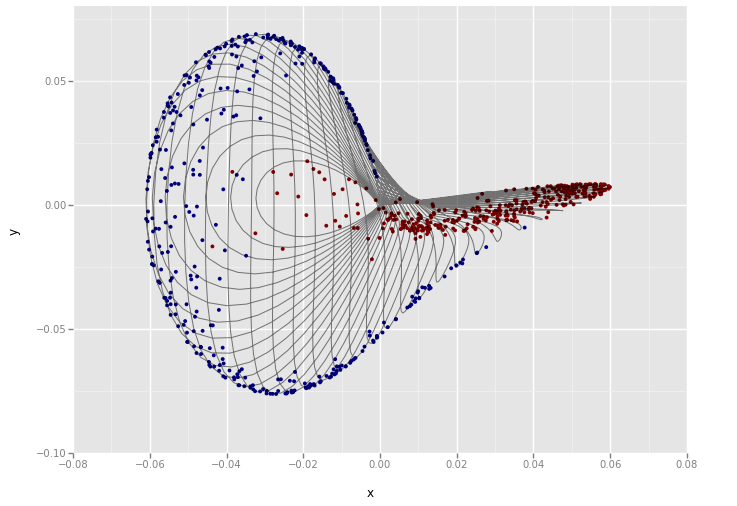

<ggplot: (317706721)>

In [228]:
X_reduced = kt.transform(X_train)
plot_space(X_train, y_train, X_reduced, kt, space='feature')

We can also see, how our kernels are projected on the original space

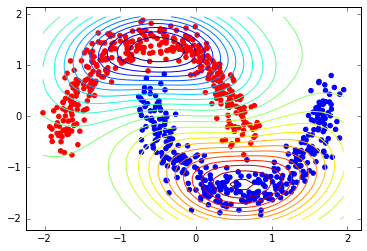

In [229]:
plot_kernel_lines(X_train, y_train, kt)

### Linear classifier in feature space
Let's illustrate, how kernel method helps in non-linear classification problem.
We can consider kernel classifier as a two step procedure:
* **Step 1. ** Map input space to a higher dimensional feature space
* **Step 2.** Perform linear classification in feature space.

Use KernelTransformer to map input points $\x_i$ to a feature space

In [230]:
kpca = KernelTransformer(kernel='rbf', gamma=6.0)
kpca.fit(X_train, y_train);

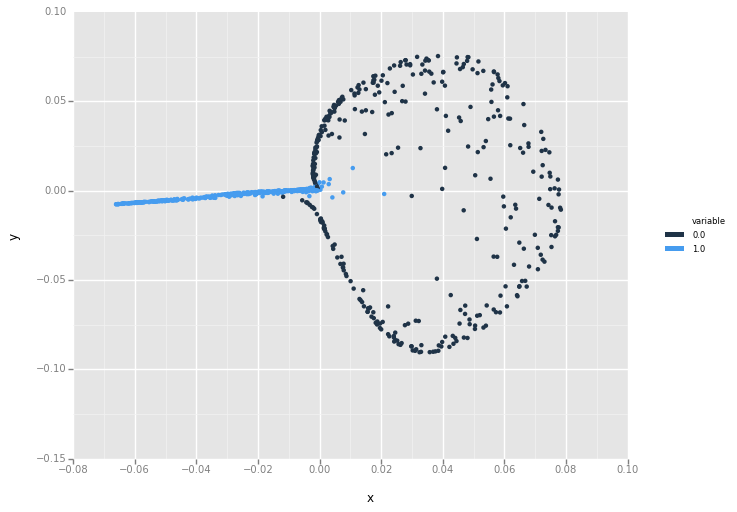

<ggplot: (326317993)>

In [231]:
X_train_reduced = kpca.transform(X_train)[:,:2]
X_test_reduced = kpca.transform(X_test)[:,:2]
dat = pd.DataFrame({'x': X_train_reduced.T[0], 'y': X_train_reduced.T[1], 'variable': y_train})
ggplot(aes('x', 'y', color='variable'), data=dat) + geom_point()

Use linear classifier to separate projected points

In [234]:
clf = KernelClassifier(kernel='linear')
clf.fit(X_train_reduced, y_train);

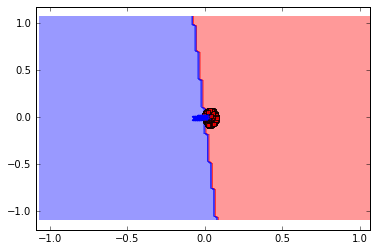

In [235]:
plot_decision_regions(X_train_reduced, y_train, clf)